In [1]:
import pandas as pd

df = pd.read_pickle('onsen_dataset.pkl')

In [2]:
LEAST_REVIEWS = 5

groups = df.groupby('onsen')
print('all onsen:', len(groups))

onsen_more_than_reviews = []
for onsen, group in groups:
    if len(group) > LEAST_REVIEWS:
        onsen_more_than_reviews.append(onsen)
print(str(LEAST_REVIEWS) + '> onsen:', len(onsen_more_than_reviews))
df = df[df['onsen'].isin(onsen_more_than_reviews)]
df

all onsen: 1260
5> onsen: 472


,onsen,is_review,comment
0,瀬波温泉,False,夕日と雪景色が日本海の旅情を高めるいで湯。瀬波を訪れた歌人・与謝野晶子は、1泊の逗留中に45...
1,瀬波温泉,True,海が近い
2,瀬波温泉,True,日本海に面して眺望が良く、佐渡島と粟島の島影が綺麗である。温泉からは日本海が美しく、浴室内も...
3,瀬波温泉,True,海辺の温泉ホテル。窓からは砂浜が見え、散歩している方がいるノドかな風景。
4,瀬波温泉,True,夕日の綺麗さは、由良温泉・湯野浜温泉でも日本海の海辺の温泉宿では当たり前
...,...,...,...
14064,秋保温泉,True,ら車で３０分位の所で電車だと少し不便だが自然が残るのんびり温泉が楽しめる、又行きたい温泉地である。
14065,秋保温泉,True,ホテルが点在しており店舗等も少ない。ホテル内でのんびり過ごす人には向いている。
14066,秋保温泉,True,建物・部屋・内装・食事ともに平均値以上 価格以上の満足を感じました。当然温泉も温度・肌触りと...
14067,秋保温泉,True,平均点以上と思います・


In [3]:
from preprocess import clean, doc_to_words
from gensim.models.doc2vec import TaggedDocument


def documents(df):
    for onsen, group in df.groupby('onsen'):
        sentences = '。'.join(group['comment'])
        sentences = clean(sentences)
        words = doc_to_words(sentences)
        yield TaggedDocument(words=words, tags=[onsen])

def documents_without_reviews(df):
    df_wo_reviews = df[df['is_review'] == False]
    for i, row in df_wo_reviews.iterrows():
        sentences = clean(row['comment'])
        words = doc_to_words(sentences)
        yield TaggedDocument(words=words, tags=[row['onsen']])

In [4]:
from train import train, train_pretrained, save_corpus

train_corpus = list(documents(df))
model = train(list(documents(df)))
# model = train_pretrained(train_corpus, 'model/wordvecs.txt')
model.save('onsen2vec.model')
save_corpus(train_corpus, name='onsen2vec.corpus')

Epoch #0 start
top 1 accuracy: 0.00423728813559322
top 3 accuracy: 0.01059322033898305
top 5 accuracy: 0.01059322033898305
Epoch #0 end
Epoch #1 start
top 1 accuracy: 0.01059322033898305
top 3 accuracy: 0.014830508474576272
top 5 accuracy: 0.019067796610169493
Epoch #1 end
Epoch #2 start
top 1 accuracy: 0.019067796610169493
top 3 accuracy: 0.023305084745762712
top 5 accuracy: 0.02754237288135593
Epoch #2 end
Epoch #3 start
top 1 accuracy: 0.03389830508474576
top 3 accuracy: 0.0423728813559322
top 5 accuracy: 0.05296610169491525
Epoch #3 end
Epoch #4 start
top 1 accuracy: 0.036016949152542374
top 3 accuracy: 0.057203389830508475
top 5 accuracy: 0.0614406779661017
Epoch #4 end
Epoch #5 start
top 1 accuracy: 0.0614406779661017
top 3 accuracy: 0.06991525423728813
top 5 accuracy: 0.07415254237288135
Epoch #5 end
Epoch #6 start
top 1 accuracy: 0.06567796610169492
top 3 accuracy: 0.08050847457627118
top 5 accuracy: 0.0826271186440678
Epoch #6 end
Epoch #7 start
top 1 accuracy: 0.0741525423728

In [2]:
import numpy as np

best = np.array([0.00423728813559322,0.00211864406779661,0.00423728813559322,0.00423728813559322,0.00423728813559322,0.01059322033898305,0.019067796610169493,0.02754237288135593,0.0423728813559322,0.06779661016949153,0.09745762711864407,0.11440677966101695,0.1504237288135593,0.2076271186440678,0.2754237288135593,0.3347457627118644,0.3813559322033898,0.4364406779661017,0.4894067796610169,0.5402542372881356,0.5783898305084746,0.6101694915254238,0.6313559322033898,0.6546610169491526,0.6800847457627118,0.6927966101694916,0.711864406779661,0.7203389830508474,0.7182203389830508,0.7330508474576272])
with_review = np.array([0.00423728813559322,0.01059322033898305,0.019067796610169493,0.03389830508474576,0.036016949152542374,0.0614406779661017,0.06567796610169492,0.07415254237288135,0.08050847457627118,0.08898305084745763,0.09533898305084745,0.08686440677966102,0.08686440677966102,0.08050847457627118,0.08050847457627118,0.08050847457627118,0.08050847457627118,0.0847457627118644,0.0826271186440678,0.0826271186440678,0.0847457627118644,0.07838983050847458,0.07838983050847458,0.0826271186440678,0.08686440677966102,0.08898305084745763,0.08898305084745763,0.09110169491525423,0.09322033898305085,0.09110169491525423])
all_words = np.array([0.00211864406779661,0.014830508474576272,0.046610169491525424,0.0635593220338983,0.07627118644067797,0.08898305084745763,0.1059322033898305,0.12076271186440678,0.13983050847457626,0.15254237288135594,0.1652542372881356,0.17796610169491525,0.19915254237288135,0.21398305084745764,0.23728813559322035,0.2457627118644068,0.2542372881355932,0.2648305084745763,0.2690677966101695,0.2711864406779661,0.2754237288135593,0.2754237288135593,0.2860169491525424,0.2966101694915254,0.3008474576271186,0.3029661016949153,0.3029661016949153,0.3050847457627119,0.3072033898305085,0.3093220338983051])
pretrained = np.array([0.00423728813559322,0.00847457627118644,0.0211864406779661,0.04449152542372881,0.06991525423728813,0.08686440677966102,0.1059322033898305,0.1228813559322034,0.13771186440677965,0.15677966101694915,0.17584745762711865,0.18220338983050846,0.19279661016949154,0.19703389830508475,0.2076271186440678,0.21822033898305085,0.2245762711864407,0.2330508474576271,0.2457627118644068,0.2542372881355932,0.2563559322033898,0.2648305084745763,0.2690677966101695,0.2711864406779661,0.2690677966101695,0.2754237288135593,0.2796610169491525,0.2796610169491525,0.2817796610169492,0.2817796610169492])

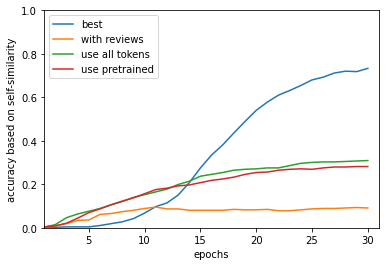

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

epoch = np.linspace(1, 30, 30)
plt.plot(epoch, best, label='best')
plt.plot(epoch, with_review, label='with reviews')
plt.plot(epoch, all_words, label='use all tokens')
plt.plot(epoch, pretrained, label='use pretrained')

plt.ylim(0, 1)
plt.xlim(1, 31)
plt.xlabel('epochs')
plt.ylabel('accuracy based on self-similarity')
plt.legend()